In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Benjamin Escobar Jaramillo, CC 1001228411

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [26]:
#hagamos todo lo que nos piden entonces
def jacobi(A,b,tol=1e-10,maxiter=100):
  '''
  Resuelve un sistema de ecuaciones Ax=b, a través del metodo iterativo de Jacobi
  ENtradas:
    A Matriz nxn NO singular (ndarray)
    b vector terminos independientes (array)
    tol(opcional) tolerancia de convergencia (estandar = 1e-10)
    maxiter(opcional): maximas iteraciones a realizar (estandar = 100)
  salidas:
    x vector solucion (array) (aproximación numérica)
    l numero de iteraciones tomadas para llegar a la aproximación
  '''
  xnew=np.zeros_like(b) #nuestro k
  xanterior=np.zeros_like(xnew) #nuestro k-1 ambas aproximaciones iniciales como un vector nulo
  n=len(b)#el tamaño del vector b será igual al de x

  for l in range(maxiter+1): #queremos que ocurra unas maxiter veces o hasta alcanzar convergencia

    for i in range(n):
      suma=0.0 #actualizamos en cada i la suma
      for j in range(n):
        if j!=i:
          suma+=((A[i][j])*xanterior[j]) #realiza la sumatoria

      xnew[i]=( (1/(A[i][i]))* (b[i]  -suma )   ) #y aqui actualizamos el nuevo vector!

    if np.linalg.norm(xnew-xanterior)<tol:  #condicionamos a la tolerancia
      return xnew, l #si ocurre, devolvemos salidas
    else:
      xanterior[:]=xnew #de lo contrario, actualizamos y se repite el ciclo

  return xnew,l #Si no converge, que devuelva una aproximacióm

In [32]:
#BIEn, ahora probemos si funciona!!
A=np.array([[10,-1,2,0],         #Matriz A
            [-2,11,0,-4],
            [3,-1,10,-1],
            [0,2,-1,8]],dtype=float)

b=np.array([6,25,-11,15],dtype=float)           #VEctor de terminos independientes b

solJacobi=jacobi(A,b)
print(f'La solución aproximada es {solJacobi[0]}, en tal solo {solJacobi[1]} iteraciones')

La solución aproximada es [ 1.09266453  2.84712066 -1.03976234  1.03324954], en tal solo 19 iteraciones


In [28]:
np.linalg.solve(A,b) #Eureka! todo parece indicar que funciona de maravilla! veamos entonces nuestra convergencia

array([ 1.09266453,  2.84712066, -1.03976234,  1.03324954])

In [31]:
solJacobi=jacobi(A,b)[0]
solReal=np.linalg.solve(A,b)

np.isclose(solJacobi,solReal).all() #A-Ha! miren cuanta precisión! pero por supuesto, con una tolerancia de 1e-10!! veamos entonces su comportamiento

np.True_

In [44]:
tol=np.logspace(-18, -1, 18) #Esta es nuestro array de tolerancias
error=np.zeros_like(tol)
iteraciones=np.zeros_like(error)
real=np.linalg.solve(A,b)


n=0
for i in tol:
  error[n]=np.linalg.norm(jacobi(A,b,tol=i)[0]-real)
  iteraciones[n]=jacobi(A,b,tol=i)[1]   #Voila, aqui almacenamos nuestro error, y nuestra iteracion asociada
  n+=1

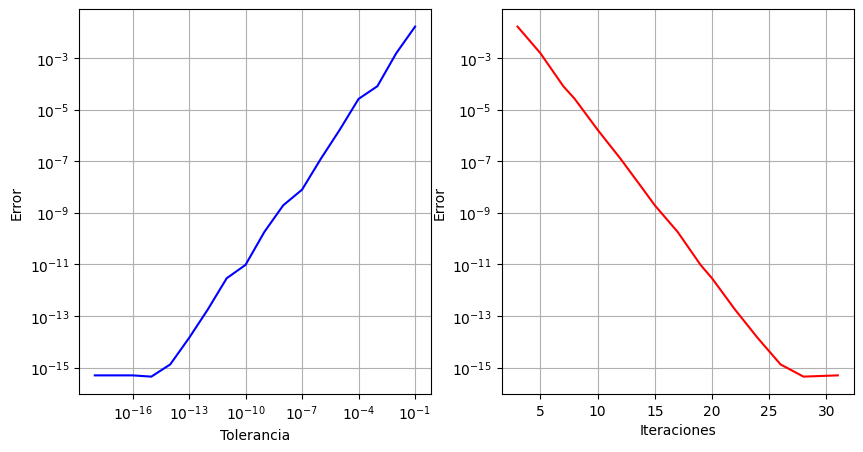

In [71]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].loglog(tol,error,c='b')
ax[0].set(
    xlabel=('Tolerancia'),
    ylabel=('Error'))


ax[1].plot(iteraciones,error,c='r')
ax[1].set(
    yscale=('log'),xlabel=('Iteraciones'),
    ylabel=('Error'))
ax[0].grid()
ax[1].grid()

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


In [153]:
#Perfecto!! Re organicemos nuestra función, tan sencillo como: EDO de segundo orden? --->  dos ecuaciones de primer orden!

def f(t,Y,m,c,K):
  '''
  convierte Y en su forma matricial a dYdt
  Entradas:
    t: asociado a los tiempos
    Y: matriz de la forma (y,y''...)
    m,c,k: argumentos (floats)
  Saldas:
    Matriz dYdt
  '''
  #NUestro propósito es hacer un cambio de variable para poder tornar todo en EDOS de primer orden, entonces
  dYdt=np.zeros_like(Y)
  dYdt[0]=Y[1] #Aca, si nuestro array era y, yp, podemos hacer que y=y1, y'=y2, y''=y3. y al derivarlo, tendriamos y1' que seria y2!, luego y2' queseria y3! y asi susecivamente. (en general)
  dYdt[1]=(-c/m)*Y[1] - (K/m)*Y[0] #Y finalmente, es simplemente la función asociada a y'', es decir, el despeje general de la EDO de mayor grado
  return dYdt

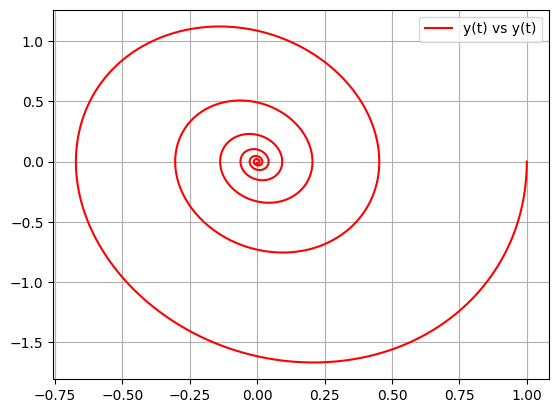

In [154]:
#BIen, probemos nuestro sistema

m=1
K=4
c=0.5
Y0=np.array([1,0]) #nuestra matriz de condiciones iniciales!!
h=0.002 #un h aceptable
t=np.arange(0,20+h,h) #nuestro intervalo de tiempo

sol=solve_ivp(f,(0,20),Y0,t_eval=t,args=(m,c,K)) #Voila, todo en orden con nuestros args
plt.plot(sol.y[0],sol.y[1],label='y(t) vs y''(t)' ,c='r')
plt.legend()
plt.grid()

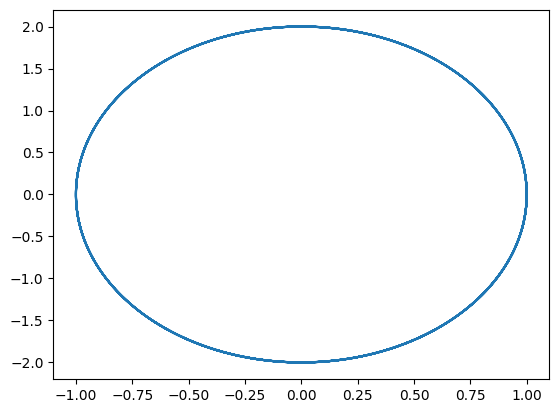

In [155]:
#Bien!! EL comportamiento es consecuente al esperado, si fuera una circunferencia, tendriamos un sistema conservativo, sin embargo, este sistema es AMORTIGUADO!
#Pues tenemos la fricción como el protagonista de nuestra No conservación de la energía

c=0
noamo=solve_ivp(f,(0,20),Y0,t_eval=t,args=(m,c,K)) #nuestro sistema no amortiguado

plt.plot(noamo.y[0],noamo.y[1]) #Y efectivamente es totalmente CONSERVATIVO

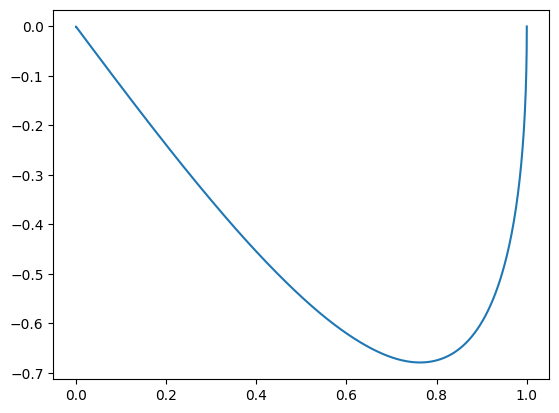

In [156]:
c=4.5
muyamo=solve_ivp(f,(0,20),Y0,t_eval=t,args=(m,c,K)) #nuestro sistema MUY amortiguado
plt.plot(muyamo.y[0],muyamo.y[1]) #Y efectivamente es para NADA CONSERVATIVO

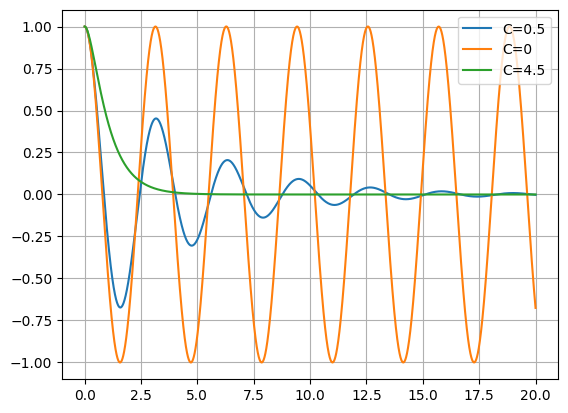

In [168]:
#Veamos entonces el y(t) de todos nuestros sistemas
plt.plot(sol.t,sol.y[0],label='C=0.5')
plt.plot(noamo.t,noamo.y[0],label='C=0')
plt.plot(muyamo.t,muyamo.y[0],label='C=4.5')
plt.grid()
plt.legend() #LOs resultados son consecuentes con el comportamiento
plt.xlabel=('t')
plt.ylabel=('y(t)')

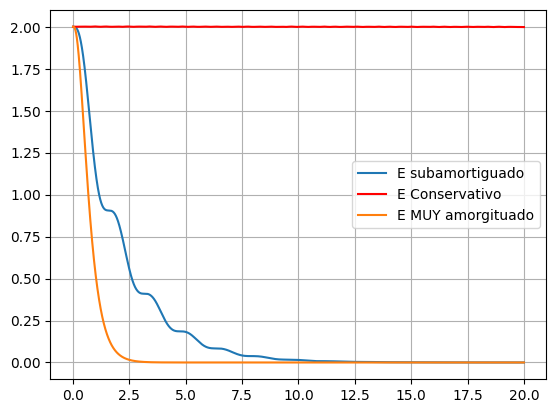

In [160]:
#Ahora las energías

Enormal=(1/2)*m*(sol.y[1])**(2) + (1/2)*K*(sol.y[0])**(2) #La primera energía
Econservativo=(1/2)*m*(noamo.y[1])**(2) + (1/2)*K*(noamo.y[0])**(2) #c=0
ENOOconservativo=(1/2)*m*(muyamo.y[1])**(2) + (1/2)*K*(muyamo.y[0])**(2) #c=4.5 (muy grande)

plt.plot(sol.t,Enormal,label='E subamortiguado')
plt.plot(sol.t,Econservativo,label='E Conservativo',c='r')
plt.plot(sol.t,ENOOconservativo,label='E MUY amorgituado')
plt.grid()
plt.xlabel=('Tiempo')
plt.ylabel=('Energía')
plt.legend()

In [ ]:
#NUestras graficas demuestran un comportamiento MUY consecuente.
#La conservativa, como lo dice su nombre, conserva su energía sin ninguna perdida
#El subamortiguado, es decir, el estandar, con un c=0.5, va perdiendo energía progresivamente, sin embargo, el muy amortiguado lo hace MUCHISIMO mas rapido, logicamente a su comportamiento.
#LOgicamente, todo es asociado al coeficiente de fricción, una suerte de ladrón de energía. Mu es muy grande? la energía decae Muy rapidamente. Mu es pequeño? decae lentamente.
#No hay fricción? pues cuantomenos en este sistema, con esats condiciones, no hay perdidas energéticas.

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [174]:
#BIen, empecemos con el determinante.

def Det(A):

  for i in range(1000):  #lo hará mil veces (wow)
    A=np.random.rand(5,5) #crea una A random
    val=np.linalg.eigvals(A) #Saca sus valores propios
    sol=1 #inicializa un lugar donde guardar las soluciones (inicia en 1 porque es productos!!!)
    for k in range(len(val)): #multiplica cada valor propio y lo guarda en sol
      sol*=val[k]

    if np.isclose(np.linalg.det(A),sol).all() == False: #SI no fueran... iguales,,,
      return print('La propiedad es.... FALSA!!') #NOs habrian engañado! y esa propiedad no existiría

  return print('La propiedad es real :)') #DE lo contrario, cuando termine todo el i in range, si nunca aparecio el return de False, inevitablemente aparecerá la conclusion :)

In [175]:
A=np.zeros((5,5)) #Primero, una matriz cualquiera solo para inicializar la función.
Det(A) #Yay!

La propiedad es real :)


In [172]:
#AHora, vamos con la traza!!!
def Traz(A):
  verificador=0 #ya explicaremos para que
  for i in range(1000):
    A=np.random.rand(5,5) #como siempre, cada iteración cambia A (la redefinimos por una nueva random!)
    val=np.linalg.eigvals(A) #Mismo proceso, extraemos los valores propios
    sol=0 #aca empieza en 0! Pues vamos es a sumar

    for k in range (len(val)):
      sol+=val[k] #y le suma cada valor propio
    if np.isclose(np.trace(A),sol).all() == True: #Para variar el metodo, sumemos cada iteracion correcta en el verificador
      verificador+=1

  if verificador==1000:      #Y si se cumplieron 1000 veces (todas), entonces la propiedad es real
    print(f'La propiedad es REAL! :)')
  else:
    print(f'Falsedades! Solo falsedades!!')

In [173]:
Traz(A)

La propiedad es REAL! :)
